In [190]:
from stravalib.client import Client
import pandas as pd
import stravalib
import webbrowser
import matplotlib.pyplot as plt
import requests as r
import geopandas
plt.style.use('bmh')

client_id, secret = open('client.secret').read().strip().split(',')
client = stravalib.client.Client()
redirect_uri='http://localhost:8888/'
scope = "activity:read_all"

auth_url = "https://www.strava.com/oauth/authorize?client_id={}&response_type=code&redirect_uri={}&scope={}".format(client_id,redirect_uri,scope)


In [191]:
print auth_url

https://www.strava.com/oauth/authorize?client_id=23579&response_type=code&redirect_uri=http://localhost:8888/&scope=activity:read_all


In [193]:
webbrowser.open(auth_url)
code='240ecde4016ee9d30d71bb0043aa842b612da0c2'

In [194]:
access_token = client.exchange_code_for_token(client_id=client_id,
                                             client_secret=secret,
                                             code=code)

In [195]:
client = Client(access_token=access_token)
all_acts = client.get_activities() # Get current athlete details
all_acts.limit = 10

In [196]:
for i in all_acts:
    print i

<Activity id=3352827241 name=u"T's brick run" resource_state=2>
<Activity id=3348105516 name=u'Haku' resource_state=2>
<Activity id=3327567262 name=u'Dry land.  Day 1. [Finally]' resource_state=2>
<Activity id=3323103115 name=u"T's Brick Run" resource_state=2>
<Activity id=3317483312 name=u'Group Workout: Lazy Mountain' resource_state=2>
<Activity id=3313706686 name=u'Afternoon Run' resource_state=2>
<Activity id=3309205763 name=u'Pettit +1' resource_state=2>
<Activity id=3268435703 name=u'Afternoon Run' resource_state=2>
<Activity id=3259587461 name=u'Lunch Activity' resource_state=2>
<Activity id=3239124145 name=u'Elephants -2' resource_state=2>


In [197]:
types=['time', 'latlng', 'distance', 'altitude', 'velocity_smooth',
'heartrate', 'cadence', 'watts', 'temp', 'moving', 'grade_smooth']

tmp_0 = client.get_activity_streams(3352827241,types=types)

tmp_0.keys()

[u'distance',
 u'heartrate',
 u'temp',
 u'altitude',
 u'grade_smooth',
 u'moving',
 u'time',
 u'velocity_smooth',
 u'latlng',
 u'cadence']

In [198]:
''' make tmp_0 into df '''
data_df = pd.DataFrame()
for key in tmp_0.keys():
    data_df[key] = tmp_0[key].data
    
data_df.head()

,distance,heartrate,temp,altitude,grade_smooth,moving,time,velocity_smooth,latlng,cadence
0,0.0,83,28,19.8,-1.0,False,0,0.0,"[42.424807, -71.094235]",0
1,0.0,86,28,20.2,1.9,False,3,0.0,"[42.424807, -71.094235]",0
2,20.1,86,28,19.6,1.4,True,13,1.5,"[42.424807, -71.094235]",79
3,41.3,124,28,20.6,0.0,True,20,2.4,"[42.424807, -71.094235]",81
4,44.4,124,28,20.4,3.2,True,21,3.0,"[42.424807, -71.094235]",81


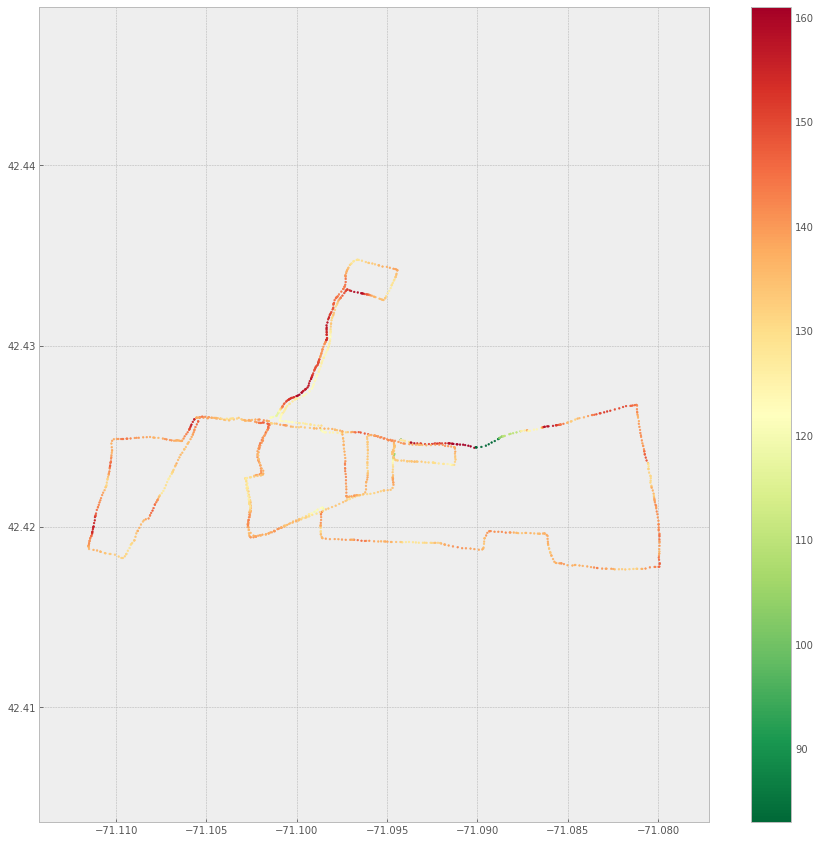

In [204]:
scttr_tmp = pd.DataFrame(tmp_0['latlng'].data)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
c = tmp_0['heartrate'].data
tst = ax.scatter(scttr_tmp[1],scttr_tmp[0],c=c, cmap='RdYlGn_r', s=3)
ax.axis('equal')
plt.colorbar(tst, ax=ax)

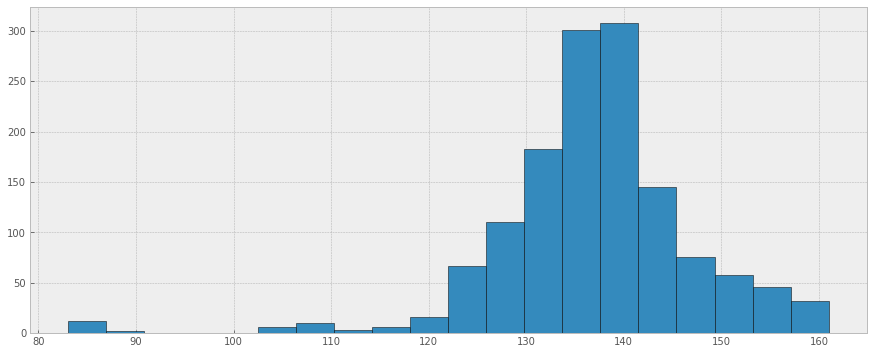

In [206]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.hist(data_df['heartrate'], bins=20, edgecolor='black');

In [207]:
def plot_seriesAndmean(series, df = data_df, figsize=(15,6), x_axis = 'distance'):
    series_min, series_max = df[series].min(), df[series].max()
    plt_ylim = (series_min * .9, series_max * 1.1 )
    fig, ax0 = plt.subplots(figsize=figsize)
    # series
    plt.plot(data_df[x_axis], data_df[series], linewidth=.5)
    # mean
    axr = ax0.twinx()
    axr.axhline(data_df.heartrate.mean(), linestyle=':', linewidth=0.5)
    # labels
    ax0.set_xlabel(x_axis)
    ax0.set_ylabel(series)
    axr.set_ylabel('average')
    # scales
    ax0.set_ylim(plt_ylim)
    axr.set_ylim(plt_ylim)

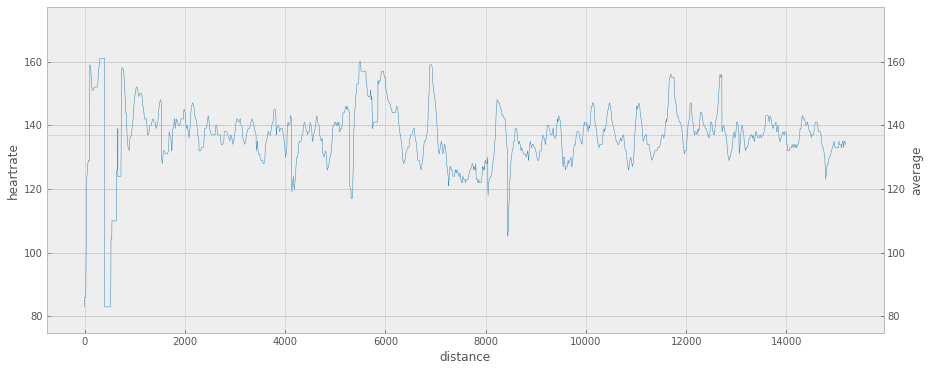

In [208]:
plot_seriesAndmean('heartrate')

In [209]:
''' 3d map '''
df_3d = data_df.loc[:,['latlng','altitude']]

In [210]:
df_3d[['lat','lng']] = pd.DataFrame(df_3d.latlng.values.tolist())
df_3d = df_3d.drop('latlng',axis=1)

In [212]:
import plotly.graph_objects as go
import numpy as np

In [227]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=df_3d.lng, y=df_3d.lat, z=df_3d.altitude,
                                   mode='markers', 
                                    marker=dict(
                                        size=3,
                                        color=data_df.heartrate, #set color equal to a variable
                                        colorscale='RdYlGn', # one of plotly colorscales
                                        showscale=True,
                                        reversescale=True)
                                   ))
fig.add_trace(go.Scatter3d(x=df_3d.lng, y=df_3d.lat, z=df_3d.altitude,
                                   mode='lines', 
                                    marker=dict(
                                        size=3,
                                        color=data_df.heartrate, #set color equal to a variable
                                        colorscale='RdYlGn', # one of plotly colorscales
                                        showscale=True,
                                        reversescale=True)
                                   ))

fig.update_layout(
            autosize=False,
            width=1000,
            height=800)

fig.show()